**Mohamed ALLILI & Sabrina CHAOUCHE**

# 3I026 - Intelligence artificielle & Data science

# Projet

## Partie 1 - Description du problème

La statistique a pour but de structurer et de représenter l'information contenue dans les données.
Cette information a un rôle important pour traduire et donner un sens aux propriétés des données. <br>
Dans ce notebook, on a choisi quelques propriétés relatives à la base de données fournie pour le projet et faire une étude statistique dessus.

## Partie 2 - Code

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
from time import gmtime, strftime
from datetime import datetime

%matplotlib inline  

### Proportion des joueurs droitiers / gauchers

In [2]:
# Lecture des données à partir du fichier CSV
data_row_player = pd.read_csv("soccer_csv/playerattributes.csv")

# Récupération des données pertinantes
columns_needed = ['player_api_id', 'preferred_foot']
data_to_use = data_row_player[columns_needed]

# Suppression des duplications
data_to_use = data_to_use.drop_duplicates(['player_api_id'], keep = 'first')

In [3]:
nb_left = 0
nb_right = 0
for i in range(data_to_use.shape[0]):
    cell = data_to_use.iloc[i]['preferred_foot']
    if cell == 'left':
        nb_left += 1
    if cell == 'right':
        nb_right += 1

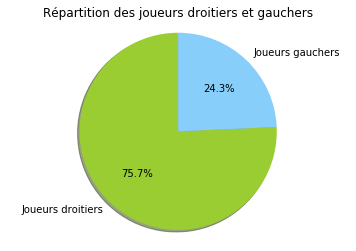

In [4]:
labels = 'Joueurs droitiers', 'Joueurs gauchers'
sizes = [nb_right, nb_left]
colors = ['yellowgreen', 'lightskyblue']

plt.pie(sizes, labels = labels, colors = colors, 
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Répartition des joueurs droitiers et gauchers')
plt.savefig('Joueurs droitiers _ gauchers.png')
plt.show()

### Répartition des joueurs selon la tranche d'âge

In [5]:
# Lecture des données à partir du fichier CSV
data_row_player = pd.read_csv("soccer_csv/player.csv")

# Récupération des données pertinantes
columns_needed = ['player_api_id', 'birthday']
data_to_use = data_row_player[columns_needed]

players_birthdays = data_to_use[:]['birthday']

In [6]:
# Obtenir la date d'aujourd'hui
today = strftime("%Y-%m-%d", gmtime())
today = datetime.strptime(today, '%Y-%m-%d')

In [7]:
# Répartition des joueurs
tranches_age = [0, 0, 0, 0]
for i in range(players_birthdays.shape[0]):
    birthday = players_birthdays[i][0:10]
    datetime_birthday = datetime.strptime(birthday, '%Y-%m-%d')
    age = int(abs((today - datetime_birthday).days)/(365))
    if age <= 20:
        tranches_age[0] += 1
    if age > 20 & age <= 24:
        tranches_age[1] += 1
    if age > 24 & age <= 28:
        tranches_age[2] += 1 
    if age > 28:
        tranches_age[3] += 1

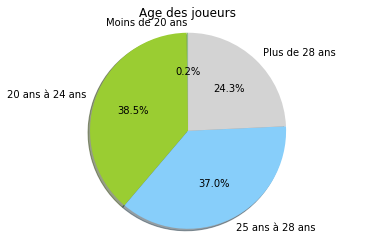

In [8]:
# Affichage des résultats
labels = 'Moins de 20 ans', '20 ans à 24 ans', '25 ans à 28 ans', 'Plus de 28 ans'
sizes = tranches_age
colors = ['darkseagreen', 'yellowgreen', 'lightskyblue', 'lightgrey']

plt.pie(sizes, labels = labels, colors = colors, 
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Age des joueurs')
plt.savefig('Age_Joueurs.png')
plt.show()

### Répartition des équipes selon la vitesse du jeu

In [9]:
# Récupération des données pertinantes
data_row_team = pd.read_csv("soccer_csv/teamattributes.csv")
columns_needed = ['team_api_id', 'buildUpPlaySpeedClass']
data_to_use = data_row_team[columns_needed]

# Suppression des duplications
data_to_use = data_to_use.groupby(['team_api_id'])

In [10]:
teams_results = [0, 0, 0]
groups = data_to_use.groups
for k, v in groups.items():
    nb = [0, 0, 0]
    for i in v:
        if(data_row_team.iloc[i]['buildUpPlaySpeedClass'] == 'Slow'):
            nb[0] += 1
        if(data_row_team.iloc[i]['buildUpPlaySpeedClass'] == 'Balanced'):
            nb[1] += 1
        if(data_row_team.iloc[i]['buildUpPlaySpeedClass'] == 'Fast'):
            nb[2] += 1
    index = max(enumerate(nb), key = itemgetter(1))[0]
    if(index == 0):
        teams_results[0] += 1
    if(index == 1):
        teams_results[1] += 1
    if(index == 2):
        teams_results[2] += 1

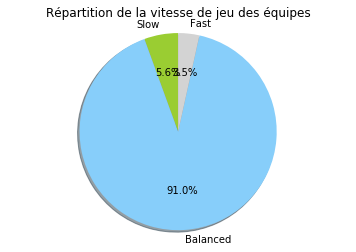

In [11]:
# Affichage des résultats
labels = 'Slow', 'Balanced', 'Fast'
sizes = teams_results
colors = ['yellowgreen', 'lightskyblue', 'lightgrey']

plt.pie(sizes, labels = labels, colors = colors, 
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Répartition de la vitesse de jeu des équipes')
plt.savefig('Vitesse_du_Jeu.png')
plt.show()

### Répartition des joueurs selon la répartition du jeu

In [12]:
# Récupération des données pertinantes
columns_needed = ['team_api_id', 'buildUpPlayPositioningClass']
data_to_use = data_row_team[columns_needed]

# Suppression des duplications
data_to_use = data_to_use.groupby(['team_api_id'])

In [13]:
teams_results = [0, 0]
groups = data_to_use.groups
for k, v in groups.items():
    nb = [0, 0]
    for i in v:
        if(data_row_team.iloc[i]['buildUpPlayPositioningClass'] == 'Organized'):
            nb[0] += 1
        if(data_row_team.iloc[i]['buildUpPlayPositioningClass'] == 'Free Form'):
            nb[1] += 1
    index = max(enumerate(nb), key = itemgetter(1))[0]
    if(index == 0):
        teams_results[0] += 1
    if(index == 1):
        teams_results[1] += 1

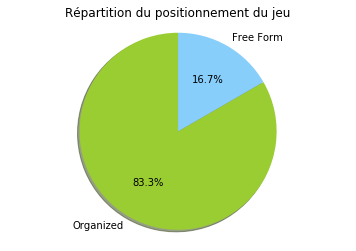

In [14]:
# Affichage des résultats
labels = 'Organized', 'Free Form'
sizes = teams_results
colors = ['yellowgreen', 'lightskyblue']

plt.pie(sizes, labels = labels, colors = colors, 
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Répartition du positionnement du jeu')
plt.savefig('Positionnement_du_Jeu.png')
plt.show()